<img src = "../images/logos.png"  align = "center">
<br>
<h1 align=center><font size = 5>Pandas dessine</font></h1>

In [1]:
# Les imports et reglages classiques
import pandas as pd
import numpy as np

# Quelques réglages
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

# Les librairies

Il existe un grand nombre de librairies Python destinées à la création de graphiques et visualisations scientiques, parmi lesquelles on peut citer :

* matplotlib
* Chaco
* PyX
* Bokeh

C'est la librairie matplotlib qui sera utilisée dans ce notebook puisqu'elle est livrée avec Pandas. C'est par ailleurs la plus robuste.

## Matplotlib

Matplotlib donne accès aux fonctionnalités graphiques dans un sous package nommé pyplot.<br>
Dans les notebook Jupyter, il convient de spécifié le mode `inline`permettant d'afficher les figures créées directement sur le notebook.

In [2]:
%matplotlib inline #si on l'oublie aucun graphique ne pourra pas s'afficher sur la page
import matplotlib as mpl
import matplotlib.pyplot as plt

### Un premier graphique avec des données aléatoires

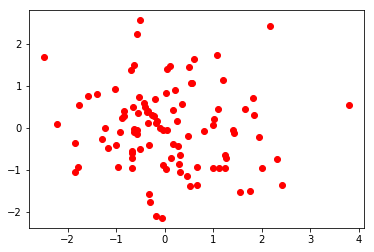

In [3]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'ro') #ro représente le rond pou rafficher le point

Ce graphique représente tout simplement deux ensembles de valeurs aléatoires prises dans une distribution normale et formant un ensemble d points (x, y). L'argument `'ro'` est un raccorçi signifiant que les points seront représentés par des cercles rouges.

C'était rapide et efficace mais on peut faire mieux et plus compliqué !

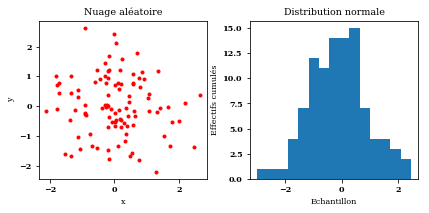

In [4]:
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121) #découpage de graphique en 2 morceau pour 2 petits graphiques
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title("Nuage aléatoire")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=15) #bins c'est le nombre d'intervales
    ax2.set_xlabel('Echantillon')
    ax2.set_ylabel('Effectifs cumulés')
    ax2.set_title("Distribution normale")
    plt.tight_layout()
    plt.savefig("ndistri_normale.png", dpi=150) #savefig pour sauvegarder en dehors du notebook en png ou ce qu'on veut

Le rendu n'est pas absolument génial coté graphique mais c'est suffisant pour une visualisation de données et permet de nombreuses personnalisations.<br>
Il est possible de créer des graphiques plus jolis en récupérant des packages libres tels que *matplotlibrc* de [Huy Nguyen](http://www.huyng.com/posts/sane-color-scheme-for-matplotlib/).

## Créer des graphiques avec Pandas

Pandas possède des méthodes de représenter les Series et les dataFrame avec beaucoup de précision.

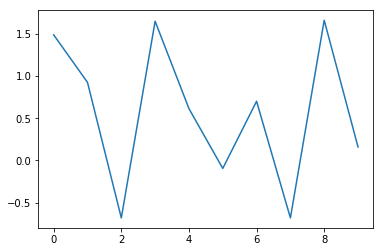

In [7]:
norm = pd.Series(np.random.normal(size=10))
norm.plot()

Remarquez que par défaut le type de graphique est une *ligne* et qu'il n'y a pas de grille.

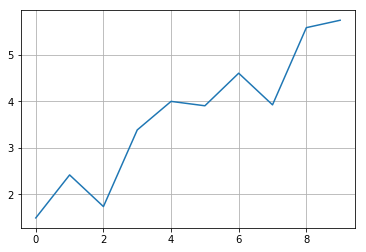

In [8]:
norm.cumsum().plot(grid=True) #cumsum est une somme cumulée de tous les effectifs (toutes les valeurs présentes dans la série)

Et de même pour un DataFrame:

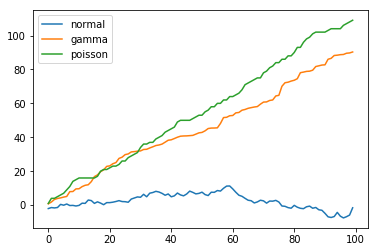

In [9]:
vars = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
vars.cumsum(0).plot() #le 0 dans cumsum c'est pour prendre la premiere valeur qui comporte les données

Les graphiques créés par Pands sont d'une très bonne qualité et restent lisibles y compris lorsque le graphique est disvisé en zones "subplots"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013437C885C0>,
      dtype=object)

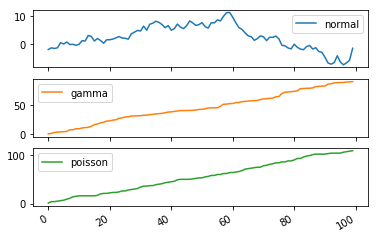

In [10]:
vars.cumsum(0).plot(subplots=True) #avec subplot il fait tout seul 3 graphiques séparés

Ou encore si on desire un graphique avec plus de légende et plus de lisibilité :

Text(0, 0.5, 'Valeurs cumulés')

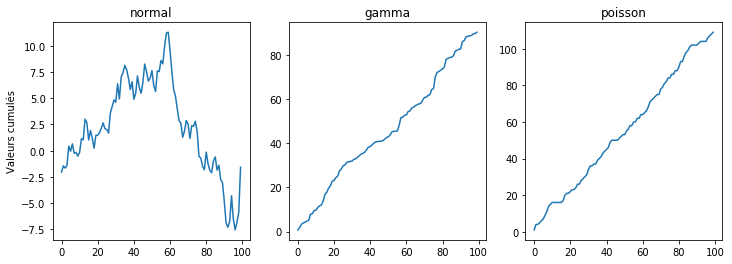

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']): #enumerate renvoie simultanément l'index et la valeur
    vars[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('Valeurs cumulés')

## Diagramme à bâtons
Avec Pandas, la création des diagrammes à bâtons devient extrèmement facile il suffit d'utiliser la méthode `plot` avec un argument `kind='bar'`.

Dans la suite les données support seront celles du Titanic :

In [12]:
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.head()

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

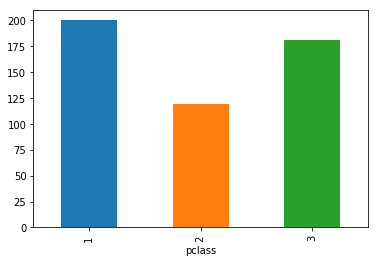

In [13]:
titanic.groupby('pclass').survived.sum().plot(kind='bar')

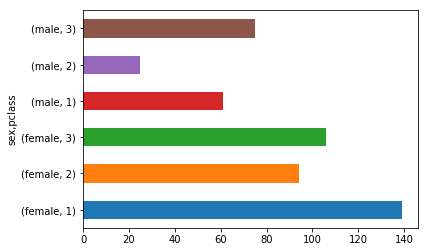

In [14]:
titanic.groupby(['sex','pclass']).survived.sum().plot(kind='barh') #barh = bar horizontale

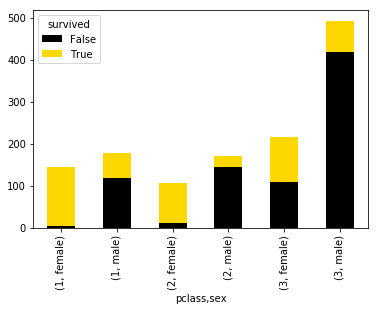

In [15]:
nb_morts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
nb_morts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

Une autre manière de comparer les groupes est de représenter le taux de survivants par rapport au nombre de personnes dans chaque groupe.

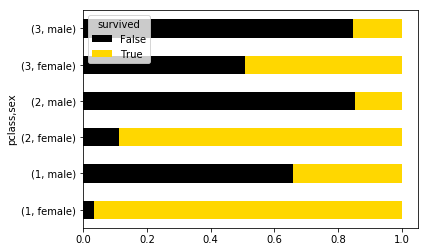

In [16]:
nb_morts.div(nb_morts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

## Histogrammes

Les histogrammes sont un excellent moyen de visualiser la *distribution* des données préalablement à l'analyse.

Ci-dessous, le graphique permet de visualiser la distribution des tarifs (fares) à bord du titanic:

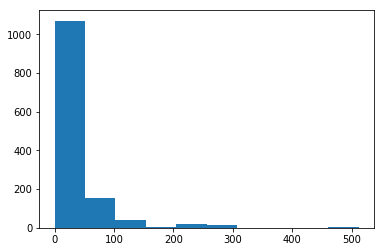

In [17]:
titanic.fare.hist(grid=False)

La méthode `hist` découpe la variable continue *fare* en intervalles **bins**, en divisnat l'amplitude par 10. Mais il est possible de personnaliser le découpage :

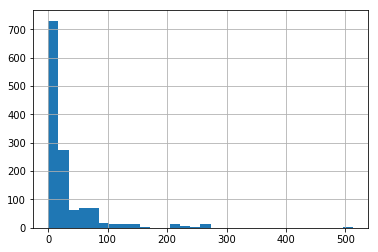

In [18]:
titanic.fare.hist(bins=30)

## Diagramme de densité
Un diagramme de densité (density plot) est similaire à l'histogramme mais plus adapté aux varaibles continues et permet d'avoir une meilleure approche de la distribution des données puisque la courbe est lissée.<br>
Ces diagrammes necessitent la présence du module `scipy` dans le kernel Python (Il faut donc parfois l'installer *avec pip*). Ensuite il suffit d'utiliser la méthode density ou kde (kernel density estimate).

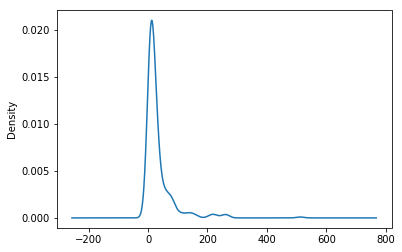

In [19]:
titanic.fare.plot.density()

Histogrammes et courbe de densité sont souvent représentés ensembles mais dans ce cas il faut normaliser les données de l'histogramme !

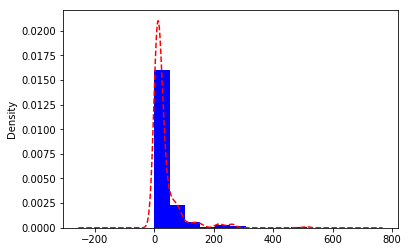

In [20]:
titanic.fare.dropna().hist(density=True, color='b')
titanic.fare.plot.density(style='r--')

## Boites à moustache (Boxplots)

Une autre approche, plus statistique, permet de visualiser les données en mettant en avant la distribution des valeurs par rapport aux indicateurs de dispersion : mini, maxi, médiane et quartiles ainsi que les 5% plus grandes et plus petites valeurs.

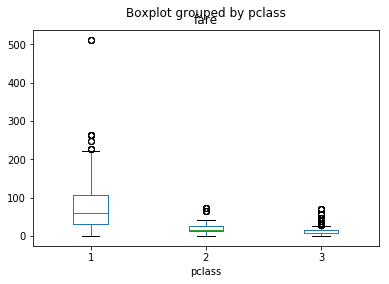

In [21]:
titanic.boxplot(column='fare', by='pclass', grid=False)#le boxplot pointe vers les outlayers (au dela des 99%) pour trouver les fautes ou les valeurs abérantes (ici pas de valeurs abérantes c'est que dans la première classe certains ont payé leur billet très cher en rapport au 99 pourcent des autres voyageurs 1ere classe)

On peut ainsi détecter les valeurs isolées (outliers) qui peuvent être abérrantes.

### Exercice

Représenter le diagramme de densité de la distribution des ages des survivants et des victimes du Titanic.

## Nuages de points

Dans la suite le jeu de données support est "baseball.csv", il présente des données sur des joueurs de baseball.

In [22]:
baseball = pd.read_csv("data/baseball.csv")
baseball.head()

      id     player  year  stint team  lg   g  ab  r   h  ...   rbi   sb   cs  \
0  88641  womacto01  2006      2  CHN  NL  19  50  6  14  ...   2.0  1.0  1.0   
1  88643  schilcu01  2006      1  BOS  AL  31   2  0   1  ...   0.0  0.0  0.0   
2  88645  myersmi01  2006      1  NYA  AL  62   0  0   0  ...   0.0  0.0  0.0   
3  88649  helliri01  2006      1  MIL  NL  20   3  0   0  ...   0.0  0.0  0.0   
4  88650  johnsra05  2006      1  NYA  AL  33   6  0   1  ...   0.0  0.0  0.0   

   bb   so  ibb  hbp   sh   sf  gidp  
0   4  4.0  0.0  0.0  3.0  0.0   0.0  
1   0  1.0  0.0  0.0  0.0  0.0   0.0  
2   0  0.0  0.0  0.0  0.0  0.0   0.0  
3   0  2.0  0.0  0.0  0.0  0.0   0.0  
4   0  4.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 23 columns]

Les nuages de points sont très utiles lorsqu'il s'agit de déterminer les éventuelles correlations entre les différentes caractéristiques d'un jeu de données. C'est la méthode `scatter` de matplotlib qui permet de les obtenir.

(0, 200)

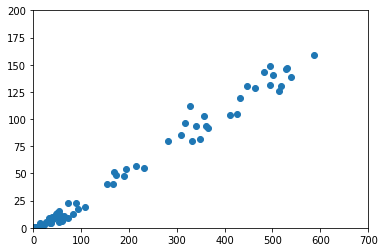

In [23]:
plt.scatter(baseball.ab, baseball.h)#ici ab c'est à baté et h pour homerun , l'importance de connaitre le dommaine , c'est comme ça ensuite qu'on peut faire des prédictions
plt.xlim(0, 700); plt.ylim(0, 200)

Il est, bien sur, possible et même conseillé d'ajouter des options afin de rendre le graphique plus lisible en modifiant la taille et la couleur des symboles.

(0, 200)

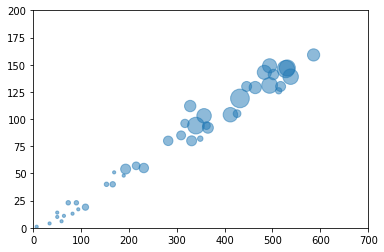

In [24]:
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)
plt.xlim(0, 700); plt.ylim(0, 200)

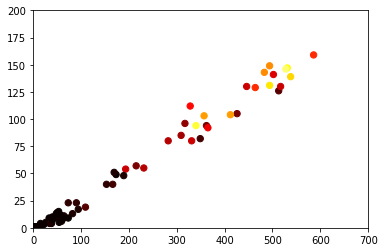

In [25]:
plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')#avec une information en plus qui est hr hit rate, parametre c = la couleur
plt.xlim(0, 700); plt.ylim(0, 200);

Pour visualiser toutes les correlations possibles il est commun d'utiliser la méhode `scatter_matrix` qui a été ajoutée à Pandas. Elle génére une matrice de nuages de points et il est possible, en option de choisir entre histogramme ou courbe de densité pour la diagonale.

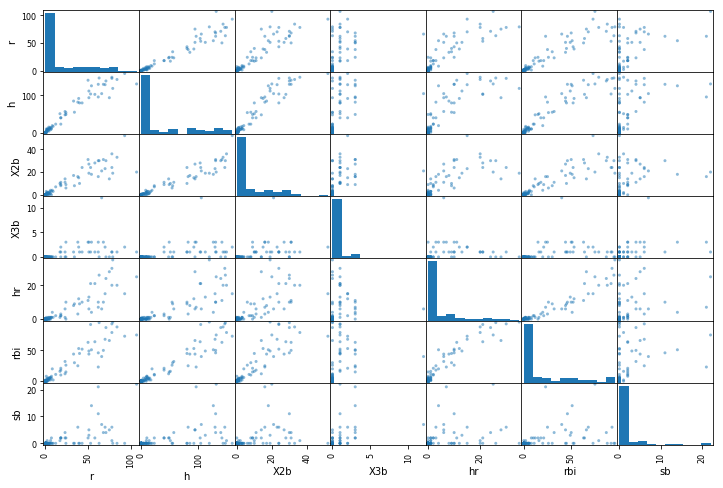

In [26]:
_ = pd.plotting.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(12,8))#.loc pour aller lire les lignes, ici il prend toutles les liges et 2 colones r et sb

<hr>
Copyright &copy; 2020 Hatem & Driss @NEEDEMAND